In [268]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as feat
import xarray as xr
#import glob
#import netCDF4 as nc
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [109]:
#the conversion formula that goes from modis sinusoidal h,v to lat,lons 
def convert_lat_lon(h,v):    
        ymax,xmin,T, R=10007555,-20015109,1111950,6371007.181
        lat=(ymax-(v+0.5)*T)/R 
        lon=(xmin+(h+0.5)*T)/(np.cos(lat)*R) *180/np.pi
        lat = lat * 180/np.pi
        return lat,lon


In [286]:
#get the values for BurnedCells, LandCells, h, v, year and month, convert hv to latlon
path='/Users/Peter 1/Desktop/Uni/HackathonUOS/data/fire_counts_from_mcd64a1_meta.csv'

BurnedCells=pd.read_csv(path)['BurnedCells'].values
LandCells=pd.read_csv(path)['LandCells'].values
BurnedCells=BurnedCells/LandCells
year=pd.read_csv(path)['year'].values
month=pd.read_csv(path)['ProductStartDay'].values//30
v=pd.read_csv(path)['v'].values
h=pd.read_csv(path)['h'].values


lat,lon=convert_lat_lon(h,v)


In [287]:
#use lat lon month year as coordinates rather than data
idx = pd.MultiIndex.from_arrays(arrays=[lat,lon,month, year], names=["lat","lon", 'month', 'year'])
s = pd.Series(data=BurnedCells, index=idx)

In [288]:
# use from_series method to get a nice xarray.dataarray
da = xr.DataArray.from_series(s)
da=da.sel(lon=slice(-180,180))
da=da.interpolate_na('lon', method='linear')

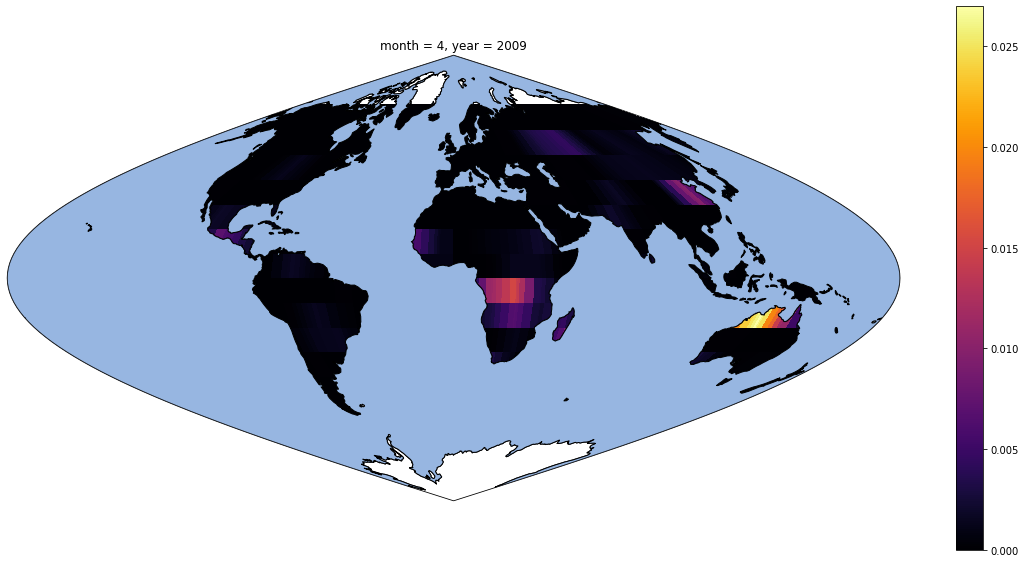

In [289]:
# plot
f, ax = plt.subplots(1, 1, figsize=(20,10), subplot_kw=dict(projection=ccrs.Sinusoidal()))

da.sel(year=2009).sel(month=4).plot(ax=ax,transform=ccrs.PlateCarree(), cmap='inferno')
ax.add_feature(feat.OCEAN, zorder=100, edgecolor='k')
ax.set_global(); ax.coastlines()